## Analyzing online shop website of cosmetic perfumery chain Douglas
by Katyaakh

To analyze the website of beautyretailer https://www.douglas.de, I choose lipstick category to monitor prices abs raings:

1. Scrape the website page  for the lipstick catalogue to extract relevant data
2. Store the data in a Pandas DataFrame
3. Analyze and visualize the data with Matplotlib


### Step 1: Scrape the Website

To scrape the website, we will use the `requests` and `BeautifulSoup` libraries in Python. These libraries will allow us to send HTTP requests to the website and parse the HTML content.

Let's start by installing the required libraries:

In [67]:
!pip install requests beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable


After installation the required libraries, import them and scrape the website to extract the relevant data.

In [68]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Create the lists for the data

products = []  # List to store names of the products
prices = []    # List to store prices of the products
ratings = []   # List to store ratings of the products

# URL of the website
url = "https://www.douglas.de/de/c/make-up/lippen/lipgloss/030202"

# Send a GET request to the website
sp = requests.get(url)

# Parse the HTML content
sp = BeautifulSoup(sp.content, 'html.parser')

# Extract the relevant data
# Loop through each product
for each in sp.find_all('a', href=True, attrs={'class': 'link link--no-decoration product-tile__main-link'}):
    name = each.find('div', attrs={'class': 'text name'})
    price = each.find('span', attrs={'class': 'product-price__price'})
    rate = each.find('span', attrs={'class': 'k3DCj3KuQfDwBmZAVbJN'})

    if name:
        products.append(name.text.strip())
    else:
        products.append(None)

    if price:
        prices.append(price.text.strip())
    else:
        prices.append(None)

    if rate:
        rating_text = rate.text.strip()
        rating_value = rating_text.split("\xa0")[0]  # Remove the non-breaking space character
        ratings.append(float(rating_value))  # Convert the text to a float
    else:
        ratings.append(None)

### Step 2: Store the Data in a Pandas DataFrame

Create a DataFrame and store the extracted data in it.

In [69]:
# Creating a DataFrame
df = pd.DataFrame({'Product Name': products, 'Price': prices, 'Rating': ratings})


### Step 3: Analyze and Visualize the Data
Visualize it and gain insights from the data. Export to csv

Visualizing the ratings and the prices using a  scatter plot.

                                 Product Name    Price  Rating
0                Glossin' Glow Tinted Lip Oil   4,29 €     4.5
1                                        High  19,99 €     4.5
2                                Lip Glow Oil  45,00 €     4.5
3                               Lip Maximizer  45,00 €     4.5
4                                   Lip Gloss  21,99 €     5.0
5                                Lifter Gloss   8,99 €     4.5
6                                Butter Gloss   6,99 €     4.5
7                             Lip Comfort Oil  28,00 €     4.5
8                                  Lip Lustre  25,00 €     4.5
9                 Lip Injection Maximum Plump  32,00 €     4.5
10                      Lip Injection Extreme  31,00 €     4.0
11                                      GLOSS  38,99 €     4.5
12                                   Lip Tint  45,00 €     4.0
13                       Twist-up Gloss Stick  15,99 €     4.5
14                                   Lipglass  24,00 € 

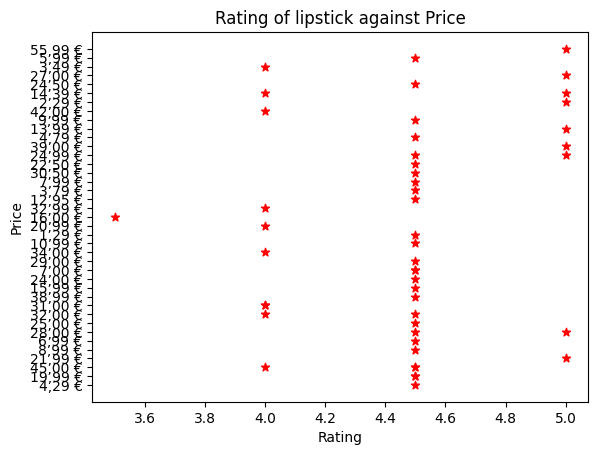

In [70]:
# Save to CSV
df.to_csv('products.csv', index=False)
print(df.to_string())

# Reading data for plotting
df2 = pd.read_csv("products.csv")

# Plotting
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Rating of lipstick against Price")

plt.scatter(df2['Rating'], df2['Price'], marker="*", c='red', alpha=1)
plt.show()

Visualizing the ratings using a bar graph.
put in ascending order and add red to green color scheme using matlib colors library

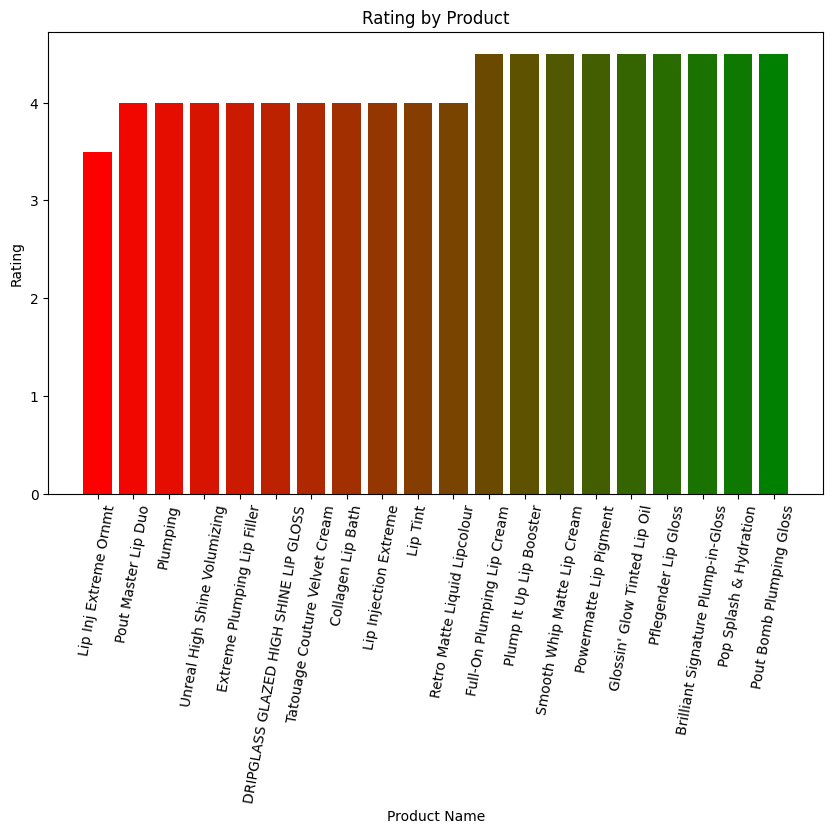

In [71]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Reading data for plotting
df2 = pd.read_csv("products.csv")

# Sorting the DataFrame by 'Rating' in ascending order
df2 = df2.sort_values('Rating', ascending=True).head(20)

# Creating a custom colormap from red to green
colors = LinearSegmentedColormap.from_list('RedToGreen', ['red', 'green'], N=256)
colormap = colors(np.linspace(0, 1, len(df2)))

# Plotting Bar Graph
plt.figure(figsize=[10,6])  # Optional: To make the graph larger

plt.bar(df2['Product Name'], df2['Rating'], color=colormap)
plt.xlabel("Product Name")
plt.ylabel("Rating")
plt.title("Rating by Product")
plt.xticks(rotation=80)  # Rotate labels for better visibility

plt.show()


Visualizing the pricing using a bar graph.
put in ascending order and add rainbow color scheme using matlib colors library

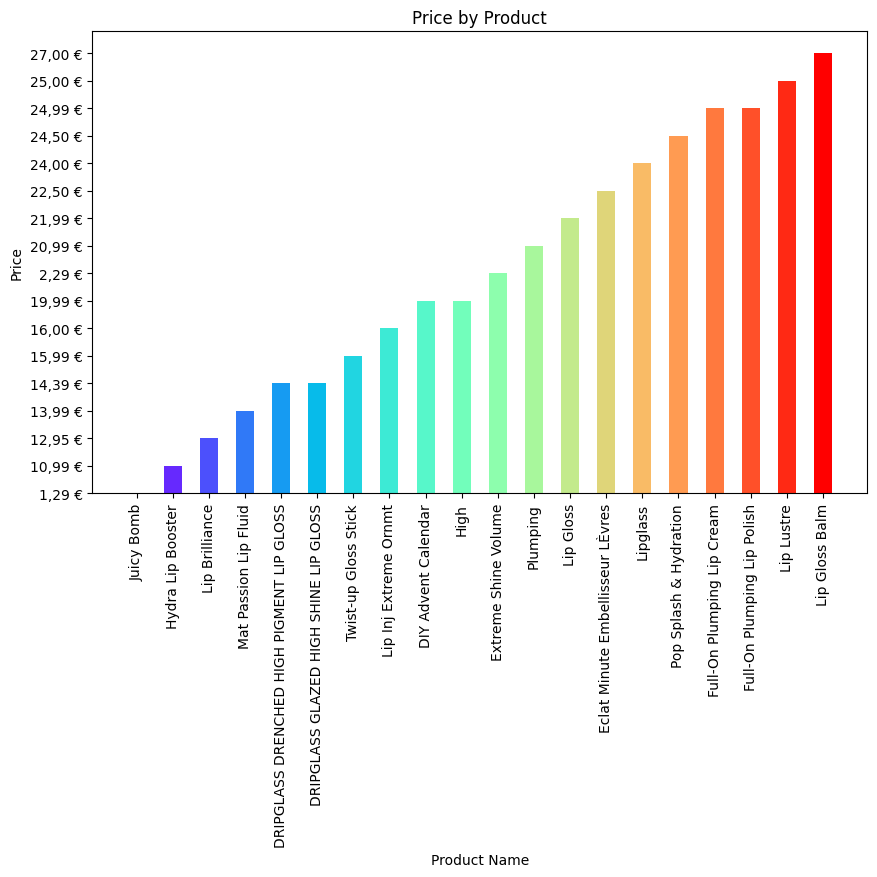

In [72]:
import matplotlib.cm as cm
import numpy as np

# Reading data for plotting
df3 = pd.read_csv("products.csv")

# Sorting the DataFrame by 'Price' in ascending order and selecting the first 15
df3 = df3.sort_values('Price', ascending=True).head(20)

# Creating a range of colors
N = len(df3['Product Name'])
colors  = cm.rainbow(np.linspace(0, 1, N))

# Plotting Bar Graph
plt.figure(figsize=[10,6])  # Optional: To make the graph larger

plt.bar(df3['Product Name'], df3['Price'], color=colors, width=0.5)
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.title("Price by Product")
plt.xticks(rotation=90)  # Rotate labels to 45 degrees for better visibility

plt.show()
